In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
left = df[df.left == 1]
left.shape

(3571, 10)

In [7]:
retained = df[df.left == 0]
retained.shape

(11428, 10)

In [8]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [9]:
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

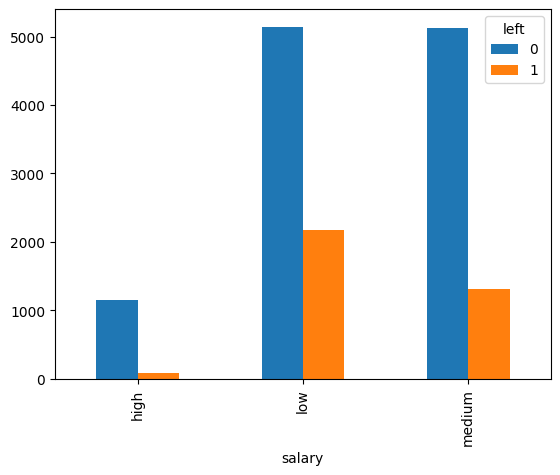

In [10]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

<Axes: xlabel='Department'>

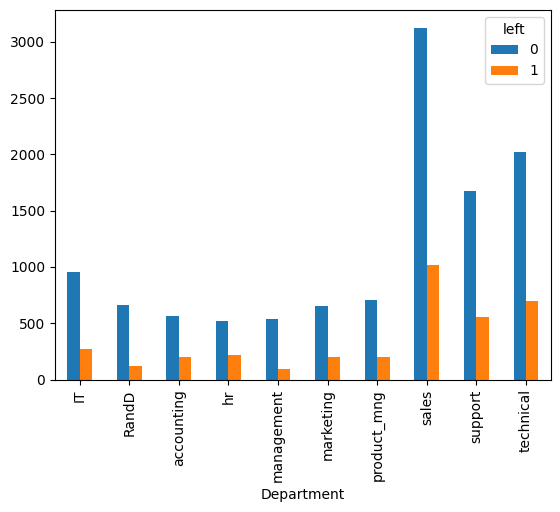

In [11]:
pd.crosstab(df.Department, df.left).plot(kind='bar')

<Axes: xlabel='number_project'>

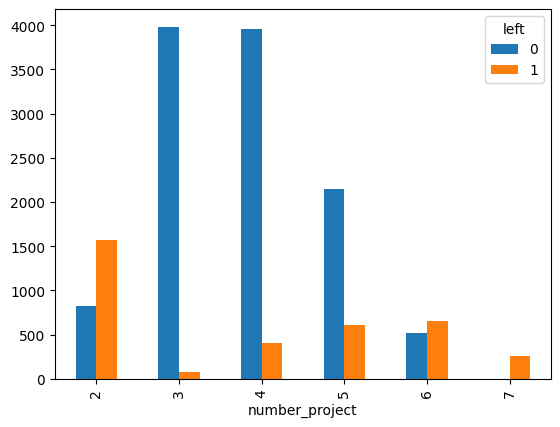

In [12]:
pd.crosstab(df.number_project, df.left).plot(kind='bar')

<Axes: xlabel='time_spend_company'>

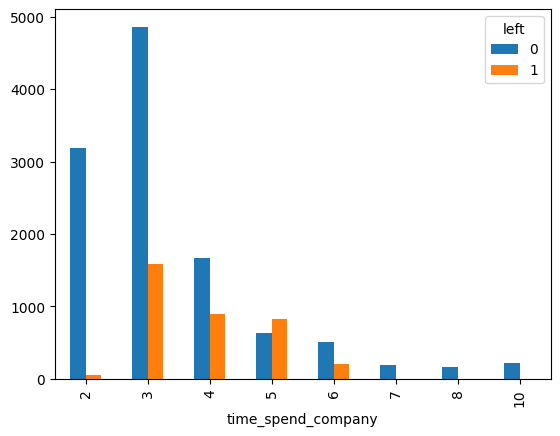

In [13]:
pd.crosstab(df.time_spend_company, df.left).plot(kind='bar')

In [14]:
newdf = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
newdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [15]:
newdf_dummy = pd.get_dummies(newdf.salary, prefix = 'salary',  dtype=int)

In [16]:
newdf_with_dummies = pd.concat([newdf, newdf_dummy], axis='columns')

In [17]:
newdf_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [18]:
newdf_with_dummies.drop('salary', axis= 'columns', inplace=True)
newdf_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [19]:
X = newdf_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [20]:
y= df.left

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.3)

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', max_iter=1000)

In [23]:
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [24]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], shape=(10500,))

In [25]:
model.score(x_test, y_test)

0.778952380952381

# Different model

In [26]:
newdf = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'Department', 'salary']]
newdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Department,salary
0,0.38,157,0,sales,low
1,0.80,262,0,sales,medium
2,0.11,272,0,sales,medium
3,0.72,223,0,sales,low
4,0.37,159,0,sales,low


In [27]:
df_with_all_dummies = pd.get_dummies(newdf, columns=['salary', 'Department'], prefix=['salary', 'Department'], dtype=int)

In [28]:
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}
newdf['salary_scaled'] = newdf['salary'].map(salary_mapping)

C:\Users\Fida\AppData\Local\Temp\ipykernel_7848\1787442883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['salary_scaled'] = newdf['salary'].map(salary_mapping)


In [29]:
newdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Department,salary,salary_scaled
0,0.38,157,0,sales,low,0
1,0.80,262,0,sales,medium,1
2,0.11,272,0,sales,medium,1
3,0.72,223,0,sales,low,0
4,0.37,159,0,sales,low,0


In [30]:
department_dummies = pd.get_dummies(newdf['Department'], prefix='Department', dtype=int)

In [31]:
df_final = pd.concat([newdf.drop(['salary', 'Department'], axis=1),
                      department_dummies,
                      newdf['salary_scaled']], axis=1)

In [32]:
df_final.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_scaled,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_scaled
0,0.38,157,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.80,262,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.11,272,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.72,223,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.37,159,0,0,0,0,0,0,0,0,0,1,0,0,0


In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.3)

# DecisionTreeClassifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [35]:
model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [36]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], shape=(10500,))

In [37]:
model.score(x_test, y_test)

0.9041904761904762

# RandomForestClassifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [39]:
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], shape=(10500,))

In [41]:
model.score(x_test, y_test)

0.9203809523809524

# GradientBoostingClassifier

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

In [43]:
model.fit(x_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [44]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], shape=(10500,))

In [45]:
model.score(x_test, y_test)

0.9159047619047619

# HistGradientBoostingClassifier

In [46]:
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier()
model.fit(x_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,max_iter,100
,max_leaf_nodes,31
,max_depth,None
,min_samples_leaf,20
,l2_regularization,0.0
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'
,monotonic_cst,None


In [47]:
model.predict(x_test)

array([1, 0, 0, ..., 0, 0, 0], shape=(10500,))

In [48]:
model.score(x_test, y_test)

0.910952380952381